<a href="https://colab.research.google.com/github/danacioDS/ML-SimpliLearn/blob/master/02_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
!pip install PyDrive

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile( {'id':"1ABHJ5n1RMH6M7FY6VvZkmP7Ww8B87JRC"} )   # replace the id with id of file you want to access
downloaded.GetContentFile('1000_Companies.csv')

**Linear Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('1000_Companies.csv')

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


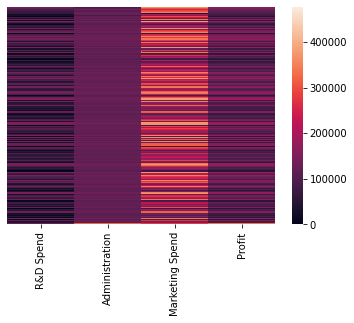

In [ ]:
sns.heatmap(data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']], yticklabels=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f927ea192b0>,
      dtype=object)

<Figure size 2160x1440 with 0 Axes>

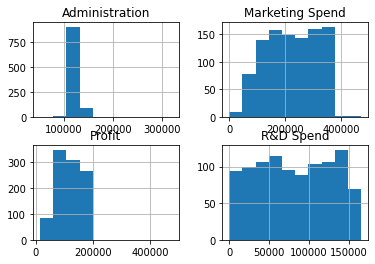

In [ ]:
plt.figure(figsize=(30,20))
data.hist()

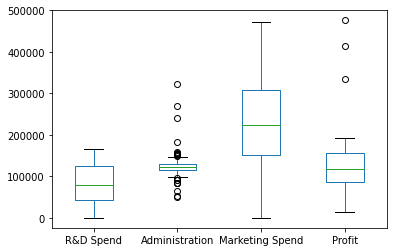

In [ ]:
data.plot(kind='box')

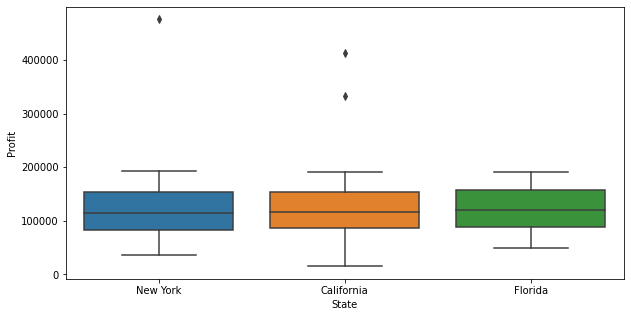

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='State', y='Profit', data=data)

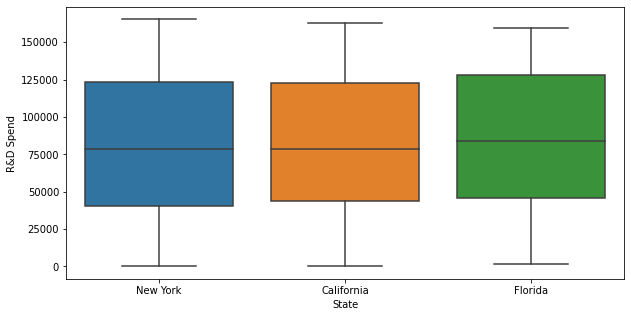

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='State', y='R&D Spend', data=data)

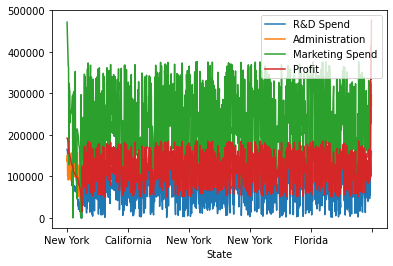

In [ ]:
data.plot('State')

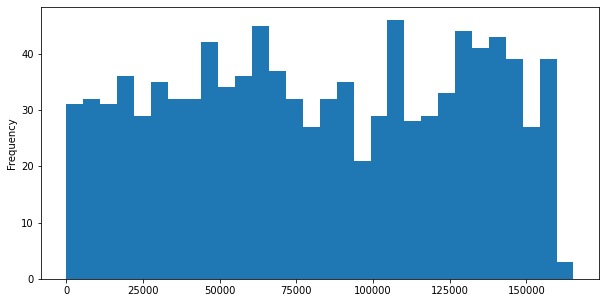

In [ ]:
data['R&D Spend'].plot.hist(bins=30, figsize=(10,5))

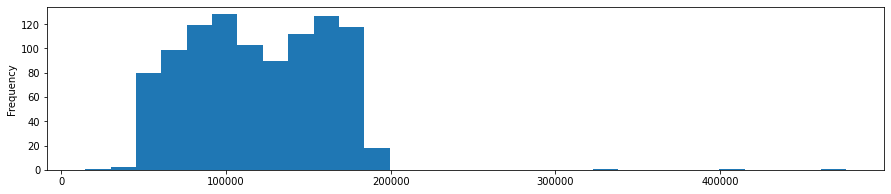

In [ ]:
plt.figure(figsize=(15,3))
data['Profit'].plot.hist(bins=30)

In [ ]:
# define Variables as array

X = data.iloc[:,:-1].values
y = data.iloc[:, 4].values

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# Define varibales as pandas 

## X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
## y = data['Profit']

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**Exploratory Data Analysis**

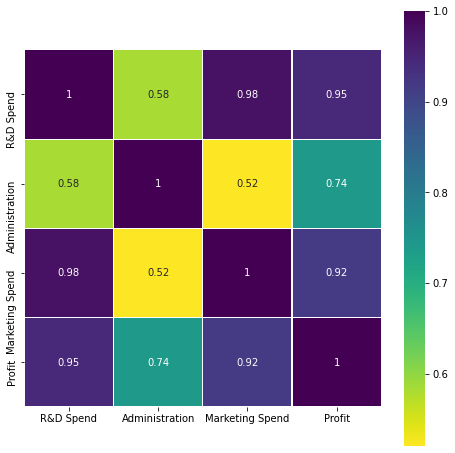

In [ ]:
plt.figure(figsize=(8,8))
colormap = plt.cm.viridis_r
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

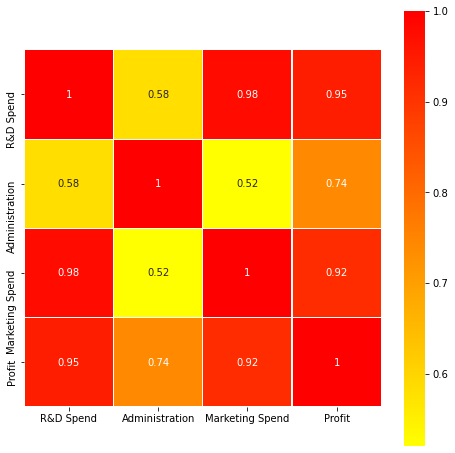

In [ ]:
plt.figure(figsize=(8,8))
colormap = plt.cm.autumn_r
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

**Linear Regression**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

In [ ]:
onehotencoder = OneHotEncoder(categories='auto', 
                              drop=None, sparse=True, 
                              handle_unknown='error')
X = onehotencoder.fit_transform(X)

In [ ]:
X = X[:,1:]

In [ ]:
# Splitting the data set into Trianing set and Test Set 

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, random_state=42)

In [ ]:
# Fitting Multiple Linear Regression to Training Set 
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
# Calculating the Coefficient
print(regressor.coef_)

[-2.23806478e+04 -1.81977239e+04  0.00000000e+00 ...  2.40909361e+04
  2.42475261e+04  4.84128786e-11]


In [ ]:
print(regressor.intercept_)

119519.25168552874


In [ ]:
# Calculating the R squared value

from sklearn.metrics import r2_score


In [ ]:
r2_score(y_test, y_pred)

-8.792597574669436e-05

In [ ]:
# Calculating the accuracy_score

from sklearn.metrics import accuracy_score